In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load the datasets
#merged_data = pd.read_csv("merged_data.csv")

# Load dataset
file_path = 'merged_data.csv'
df = pd.read_csv(file_path, parse_dates=True)

In [10]:
# Attempt to parse date columns
def parse_dates(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if column is object type
            try:
                df[col] = pd.to_datetime(df[col])
                print(f'Parsed {col} as datetime.')
            except ValueError:
                continue  # Skip columns that can't be parsed
    return df

df = parse_dates(df)

Parsed date as datetime.


/var/folders/kf/4vf9b0_j063c6zf0vs_tltrc0000gn/T/ipykernel_62031/2651756625.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [11]:
df.head()



,date,discharge_mean,discharge_max,discharge_min,water_level_mean,water_level_max,water_level_min,om_discharge,soil_moisture_0_to_100cm_mean,soil_moisture_7_to_28cm_mean,soil_moisture_0_to_7cm_mean,precipitation_sum,rain_sum,weather_code,weather_description
0,2015-06-26,6.27,6.41,6.11,29.0,29.0,28.0,1.624219,0.258290,0.266292,0.251417,0.0,0.0,61.0,"Rain, not freezing, continuous, slight at time..."
1,2015-06-27,6.65,7.94,6.10,30.0,34.0,28.0,1.529298,0.254372,0.258583,0.258417,7.2,7.2,51.0,"Drizzle, not freezing, continuous, slight at t..."
2,2015-06-28,7.15,7.62,6.68,32.0,33.0,30.0,1.500346,0.252399,0.260167,0.260625,0.3,0.3,51.0,"Drizzle, not freezing, continuous, slight at t..."
3,2015-06-29,6.51,6.68,6.37,29.0,30.0,29.0,1.437811,0.247408,0.254125,0.245167,0.3,0.3,3.0,Clouds generally forming or developing
4,2015-06-30,6.17,6.37,5.78,28.0,29.0,27.0,1.376840,0.242139,0.246417,0.232875,0.0,0.0,0.0,Cloud development not observed or not observable


In [12]:
# Feature Engineering (Extracting date components)
if any(df.select_dtypes(include=['datetime64']).columns):
    for col in df.select_dtypes(include=['datetime64']).columns:
        df[col+'_year'] = df[col].dt.year
        df[col+'_month'] = df[col].dt.month
        df[col+'_day'] = df[col].dt.day
        df[col+'_dayofweek'] = df[col].dt.dayofweek
        df[col+'_weekofyear'] = df[col].dt.isocalendar().week

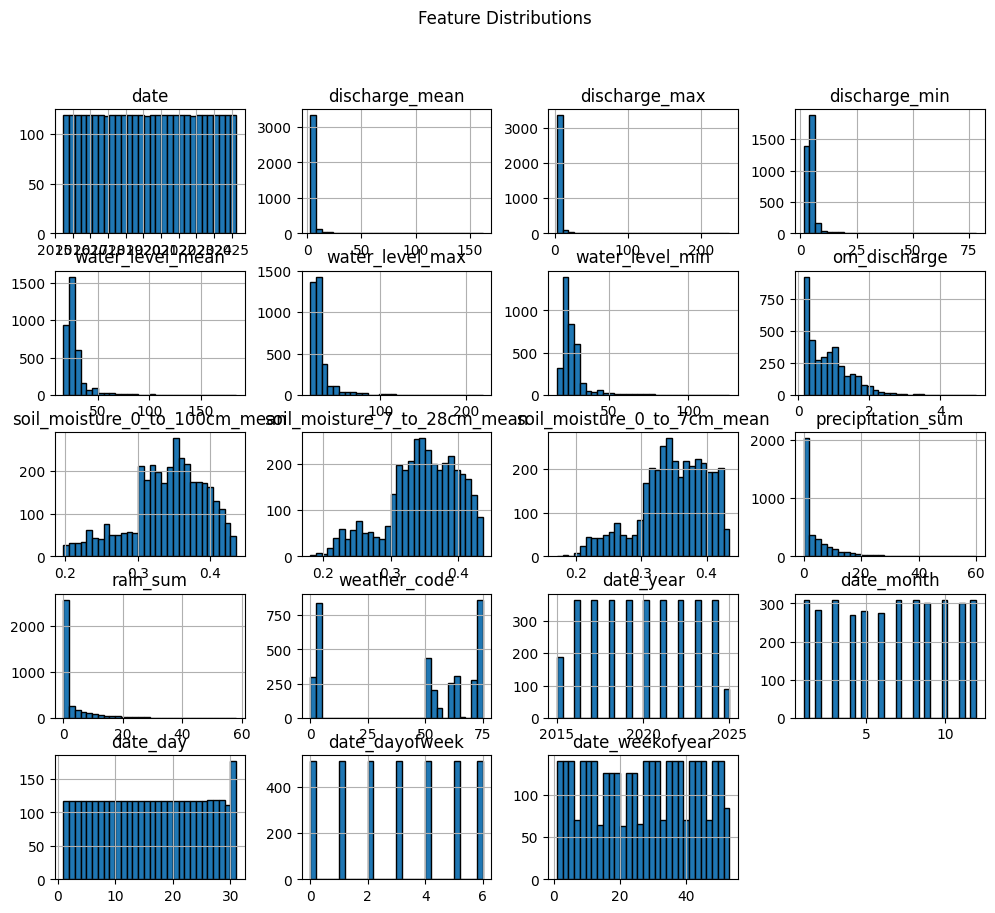

In [15]:
# Histograms of numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

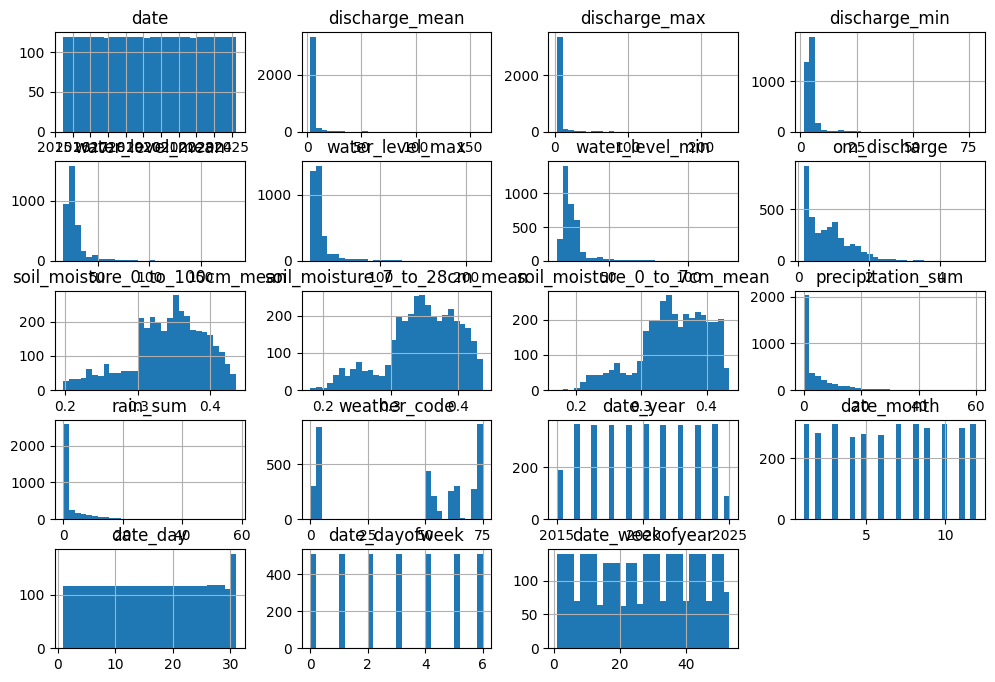

In [16]:
# Visualizing distributions
df.hist(figsize=(12, 8), bins=30)
plt.show()

In [33]:
# The cumulative discharge is calculated as the sum of the daily discharge values over time. The formula for cumulative discharge is:
# Q_cum(n) = Q_cum(n-1) + Q(n)
# Cumulative Cischarge on Day n = Cumulative Discharge on Day n-1 + Discharge on day n

df['discharge_cum'] = df['discharge_mean'].cumsum()
# Reorder the columns to place 'discharge_cum' after 'discharge_mean'
columns = df.columns.tolist()
columns.insert(columns.index('discharge_mean') + 1, columns.pop(columns.index('discharge_cum')))

df = df[columns]
print(df)

           date  discharge_mean  discharge_cum  discharge_max  discharge_min  \
0    2015-06-26            6.27           6.27           6.41           6.11   
1    2015-06-27            6.65          12.92           7.94           6.10   
2    2015-06-28            7.15          20.07           7.62           6.68   
3    2015-06-29            6.51          26.58           6.68           6.37   
4    2015-06-30            6.17          32.75           6.37           5.78   
...         ...             ...            ...            ...            ...   
3563 2025-03-28            2.89       19819.96           2.93           2.74   
3564 2025-03-29            2.92       19822.88           3.13           2.74   
3565 2025-03-30            3.42       19826.30           3.54           3.13   
3566 2025-03-31            3.33       19829.63           3.54           3.33   
3567        NaT             NaN            NaN            NaN            NaN   

      water_level_mean  water_level_max

In [36]:
# Filter the data between January 24, 2022, and today
start_date = '2022-01-24'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
compare_precipitation_with_date = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date), ['date', 'discharge_cum', 'water_level_mean', 'rain_sum', 'precipitation_sum', 
'soil_moisture_0_to_7cm_mean']]

In [38]:
compare_precipitation_with_date.to_csv('compare_precipitation_with_date.csv', index=False)

In [37]:
compare_precipitation_with_date.head()


,date,discharge_cum,water_level_mean,rain_sum,precipitation_sum,soil_moisture_0_to_7cm_mean
2404,2022-01-24,13351.66,22.0,0.0,0.000000,0.319500
2405,2022-01-25,13354.52,22.0,0.0,0.000000,0.318542
2406,2022-01-26,13357.38,22.0,0.0,0.000000,0.317583
2407,2022-01-27,13360.24,21.0,0.0,0.000000,0.316625
2408,2022-01-28,13363.09,21.0,0.0,5.899999,0.316000


In [39]:
prec = pd.read_csv('pre_om_gkd.csv')

In [ ]:
prec.head()

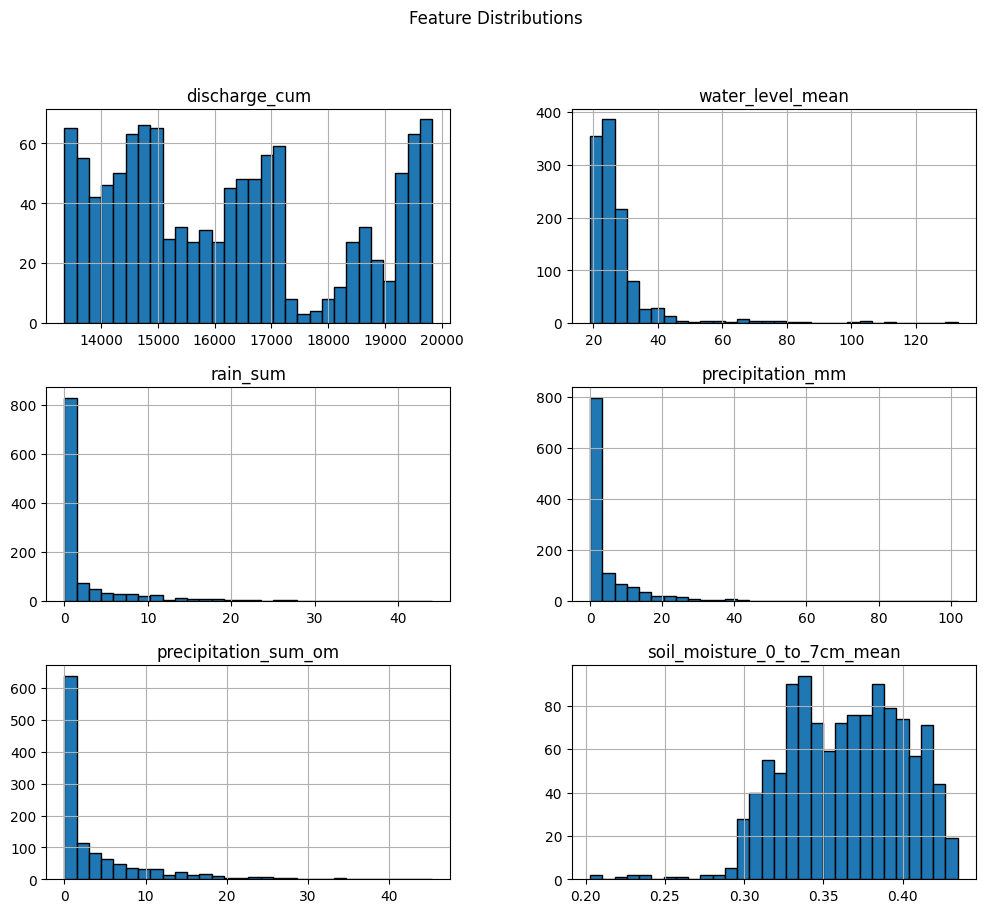

In [41]:
# Histograms of numerical features
prec.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

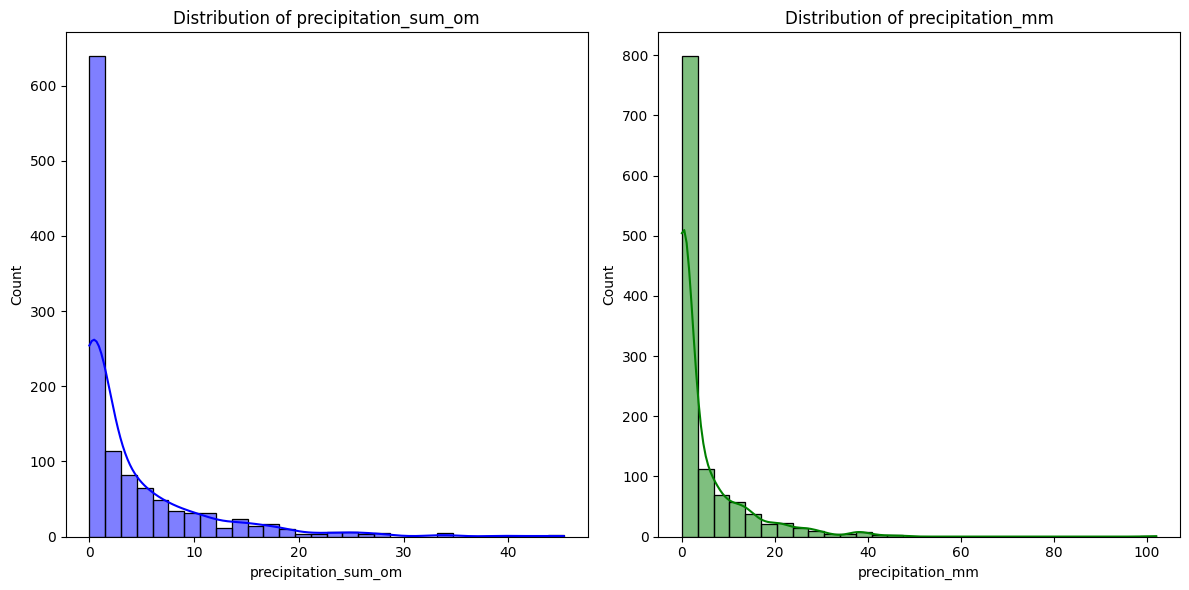

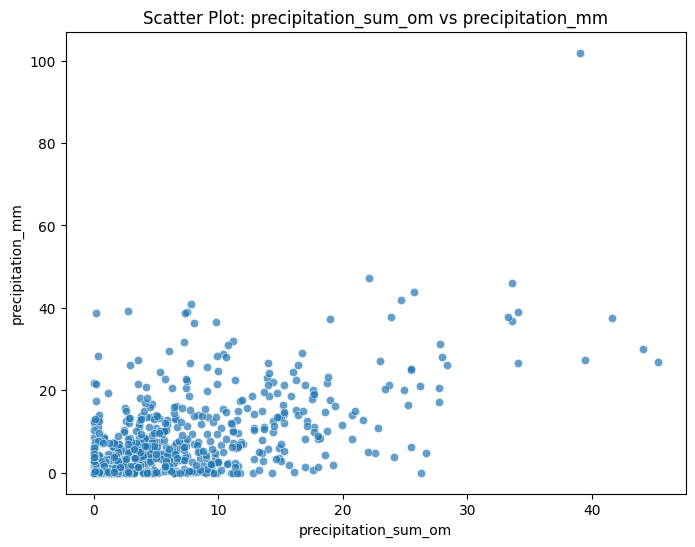

Correlation Coefficient:
                      precipitation_sum_om  precipitation_mm
precipitation_sum_om              1.000000          0.676632
precipitation_mm                  0.676632          1.000000


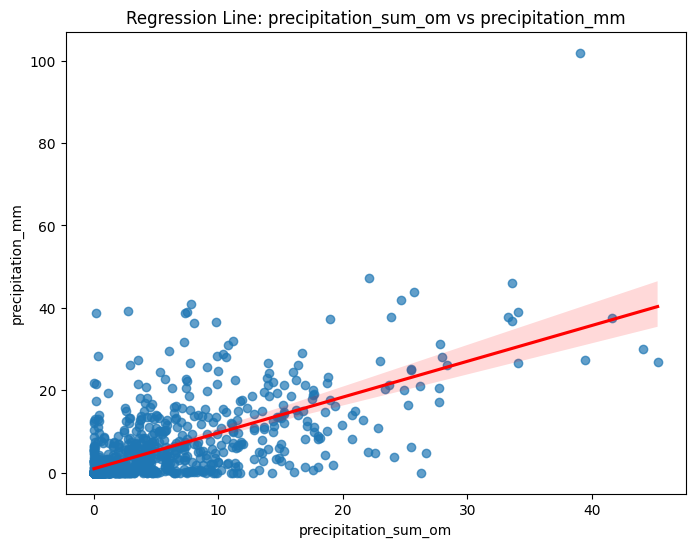

In [42]:
# Visualize the distributions of precipitation_sum_om and precipitation_mm
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(prec['precipitation_sum_om'], kde=True, bins=30, color='blue')
plt.title('Distribution of precipitation_sum_om')
plt.xlabel('precipitation_sum_om')

plt.subplot(1, 2, 2)
sns.histplot(prec['precipitation_mm'], kde=True, bins=30, color='green')
plt.title('Distribution of precipitation_mm')
plt.xlabel('precipitation_mm')

plt.tight_layout()
plt.show()

# Scatter plot to observe the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='precipitation_sum_om', y='precipitation_mm', data=prec, alpha=0.7)
plt.title('Scatter Plot: precipitation_sum_om vs precipitation_mm')
plt.xlabel('precipitation_sum_om')
plt.ylabel('precipitation_mm')
plt.show()

# Calculate the correlation coefficient
correlation = prec[['precipitation_sum_om', 'precipitation_mm']].corr()
print("Correlation Coefficient:")
print(correlation)

# Add a regression line to the scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x='precipitation_sum_om', y='precipitation_mm', data=prec, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Regression Line: precipitation_sum_om vs precipitation_mm')
plt.xlabel('precipitation_sum_om')
plt.ylabel('precipitation_mm')
plt.show()

In [61]:
# Display the correlation coefficient
print("Correlation Coefficient:")
print(correlation)
# Evaluate the strength of the correlation
if correlation.loc['precipitation_sum_om', 'precipitation_mm'] > 0.7:
    print("Strong positive correlation between precipitation_sum_om and precipitation_mm.")
elif correlation.loc['precipitation_sum_om', 'precipitation_mm'] > 0.5:
    print("Moderate positive correlation between precipitation_sum_om and precipitation_mm.")
else:
    print("Weak or no significant correlation between precipitation_sum_om and precipitation_mm.")

Correlation Coefficient:
                      precipitation_sum_om  precipitation_mm
precipitation_sum_om              1.000000          0.676632
precipitation_mm                  0.676632          1.000000
Moderate positive correlation between precipitation_sum_om and precipitation_mm.


In [62]:
corr_value = prec['precipitation_sum_om'].corr(prec['precipitation_mm'])
print("Correlation between precipitation_sum_om and precipitation_mm:", corr_value)

Correlation between precipitation_sum_om and precipitation_mm: 0.6766320131124965
